<a href="https://colab.research.google.com/github/octavio-santiago/finance/blob/master/Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=492cc63e2a3d4b75f7f9b9a10e21ea6946d27b4c699c04dd2168fcc1c0ac0720
  Stored in directory: /tmp/pip-ephem-wheel-cache-p8aoeubw/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as  web
import seaborn as sns
import math
import datetime as dt
from sklearn import preprocessing


In [0]:
#investigar a base
vvar3 = web.get_data_yahoo('VVAR3.SA',period="1y")
vvar3

[*********************100%***********************]  1 of 1 completed


Open  High   Low  Close  Adj Close     Volume
Date                                                     
2019-05-20  4.05  4.20  4.00   4.11       4.11   12621500
2019-05-21  4.14  4.32  4.12   4.31       4.31   15512800
2019-05-22  4.35  4.42  4.23   4.32       4.32   15261100
2019-05-23  4.26  4.30  4.18   4.20       4.20   10015900
2019-05-24  4.26  4.28  4.16   4.20       4.20    6734000
...          ...   ...   ...    ...        ...        ...
2020-05-13  8.80  9.21  8.33   9.14       9.14  162115000
2020-05-14  9.40  9.49  8.85   9.02       9.02  173366200
2020-05-15  8.80  9.18  8.62   8.68       8.68  105629600
2020-05-18  9.13  9.14  8.84   8.87       8.87   70247600
2020-05-19  8.96  9.63  8.88   9.33       9.33  130740600

[248 rows x 6 columns]

In [0]:
# importar bibliotecas
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=False)

#https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b
# Devido o Plotly estar sendo utilizado no Google Collab, precisaremos definir
# a função abaixo e chamá-la sempre que quisermos exibir um gráfico

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))


In [0]:
configure_plotly_browser_state()

# importar os dados do BBAS3 csv->dataframe
df = vvar3.copy()
df = df.reset_index()

# criar um gráfico interativo com o Plotly

# gráfico vvar3 (candlestick
trace1 = {
    'x': df.Date,
    'open': df.Open,
    'close': df.Close,
    'high': df.High,
    'low': df.Low,
    'type': 'candlestick',
    'name': 'VVAR3',
    'showlegend': False
}

# informar todos os dados e gráficos em uma lista
data = [trace1]

# configurar o layout do gráfico
layout = go.Layout({
    'title': {
        'text': 'Gráfico de Candlestick - VVAR3',
        'font': {
            'size': 20
        }
    }
})

# instanciar objeto Figure e plotar o gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()

In [0]:
print(df.head(5))
configure_plotly_browser_state()

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.show()

        Date  Open  High   Low  Close  Adj Close    Volume
0 2019-05-20  4.05  4.20  4.00   4.11       4.11  12621500
1 2019-05-21  4.14  4.32  4.12   4.31       4.31  15512800
2 2019-05-22  4.35  4.42  4.23   4.32       4.32  15261100
3 2019-05-23  4.26  4.30  4.18   4.20       4.20  10015900
4 2019-05-24  4.26  4.28  4.16   4.20       4.20   6734000


In [0]:
tickers = ["VVAR3.SA","TOTS3.SA","JBSS3.SA","SAPR11.SA","ALUP11.SA","CSAN3.SA","ENBR3.SA","SLCE3.SA","WEGE3.SA","USIM5.SA","VALE3.SA","ALSO3.SA","CESP6.SA","MGLU3.SA","KLBN4.SA"]
carteira = web.get_data_yahoo(tickers,period="2y")["Adj Close"]
ibov = web.get_data_yahoo("^BVSP",period="2y")["Adj Close"]

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed


In [0]:
#carteira = carteira[carteira.index.year >= 2020]
#carteira = carteira[carteira.index >= '2020-04-01']
carteira = carteira.iloc[-20:,:]
#carteira = carteira.dropna()
carteira

ALSO3.SA  ALUP11.SA   CESP6.SA  ...   VALE3.SA  VVAR3.SA   WEGE3.SA
Date                                         ...                                
2020-04-20  26.740000        NaN  26.500000  ...  42.459999      6.59  39.099998
2020-04-22  28.450001        NaN  27.150000  ...  42.900002      7.40  40.919998
2020-04-23  28.570000        NaN  27.000000  ...  43.509998      7.36  39.590000
2020-04-24  25.400000        NaN  25.240000  ...  43.759998      6.38  38.709999
2020-04-27  26.590000        NaN  26.490000  ...  44.549999      7.57  40.599998
2020-04-28  28.700001        NaN  27.650000  ...  44.610001      9.04  41.580002
2020-04-29  30.000000        NaN  28.299999  ...  46.730000      9.18  41.400002
2020-04-30  27.910000        NaN  28.160000  ...  44.860001      9.18  39.939999
2020-05-04  26.200001        NaN  27.020000  ...  43.930000      9.50  39.840000
2020-05-05  25.150000        NaN  27.480000  ...  43.700001      9.70  39.009998
2020-05-06  24.410000        NaN  26.809999  ...  44.330002     10.01  38.830002
2020-05-07  22.700001        NaN  26.000000  ...  46.049999      9.74  39.090000
2020-05-08  22.870001        NaN  26.410000  ...  48.849998      8.85  38.240002
2020-05-11  21.950001        NaN  26.049999  ...  47.730000      8.88  38.830002
2020-05-12  21.900000        NaN  25.370001  ...  47.459999      8.55  37.500000
2020-05-13  22.010000        NaN  25.490000  ...  48.540001      9.14  38.000000
2020-05-14  22.379999        NaN  25.900000  ...  48.090000      9.02  37.349998
2020-05-15  21.280001        NaN  25.990000  ...  48.049999      8.68  36.410000
2020-05-18  22.000000        NaN  26.799999  ...  51.259998      8.87  36.619999
2020-05-19  22.500000      23.58  26.180000  ...  52.439999      9.33  36.810001

[20 rows x 15 columns]

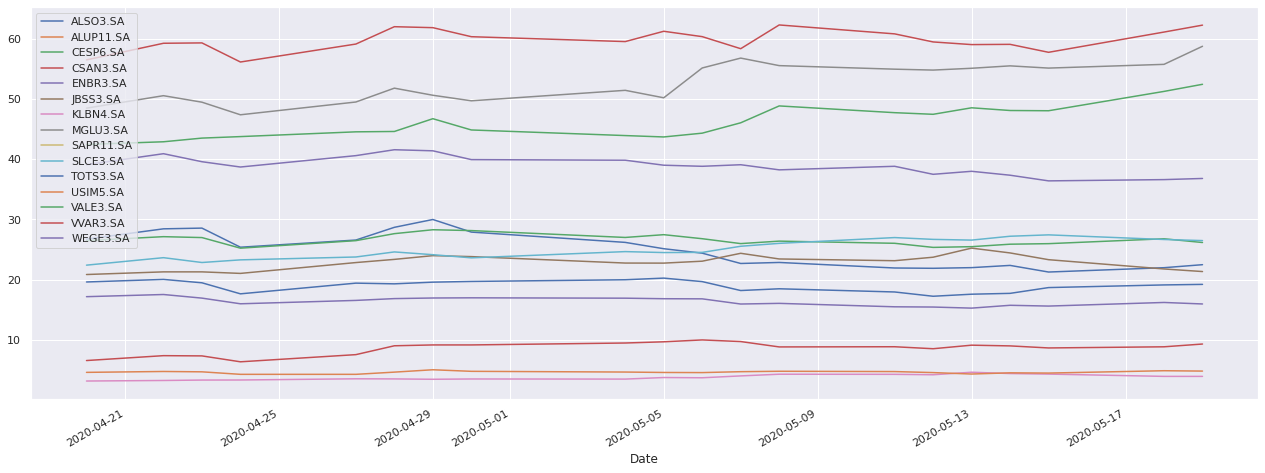

In [0]:
sns.set()
carteira.plot(figsize=(22,8))

In [0]:

#calcular retorno
df = carteira.copy()
df = df.reset_index()

colunas = df.columns
colunas = list(colunas[1:])

df_rent = df[['Date']]
n = len(df_rent)
for coluna in colunas:
  data = [0]
  for idx,val in df.iterrows():
    if idx > 0:
      #print(val, " ", df.iloc[idx-1,1:])
      #print(df.iloc[idx-1,coluna])
      R = math.log(df.loc[idx,coluna] / df.loc[idx-1,coluna])
      data.append(R)
  #x = pd.DataFrame({coluna:data})
  df_rent[coluna] = data

df_rent
#ganhos = carteira.iloc[-1,:] - carteira.iloc[0,:]
#variacao = carteira.std()
#variacao

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  ALSO3.SA  ALUP11.SA  ...  VALE3.SA  VVAR3.SA  WEGE3.SA
0  2020-04-20  0.000000        0.0  ...  0.000000  0.000000  0.000000
1  2020-04-22  0.061988        NaN  ...  0.010309  0.115927  0.045496
2  2020-04-23  0.004209        NaN  ...  0.014119 -0.005420 -0.033042
3  2020-04-24 -0.117608        NaN  ...  0.005729 -0.142892 -0.022479
4  2020-04-27  0.045786        NaN  ...  0.017892  0.171025  0.047670
5  2020-04-28  0.076362        NaN  ...  0.001346  0.177466  0.023851
6  2020-04-29  0.044300        NaN  ...  0.046428  0.015368 -0.004338
7  2020-04-30 -0.072212        NaN  ... -0.040840  0.000000 -0.035903
8  2020-05-04 -0.063226        NaN  ... -0.020949  0.034265 -0.002507
9  2020-05-05 -0.040902        NaN  ... -0.005249  0.020834 -0.021053
10 2020-05-06 -0.029865        NaN  ...  0.014314  0.031459 -0.004625
11 2020-05-07 -0.072628        NaN  ...  0.038066 -0.027344  0.006673
12 2020-05-08  0.007461        NaN  ...  0.059027 -0.095824 -0.021985
13 2020-05-11 -0.041059        NaN  ... -0.023194  0.003384  0.015311
14 2020-05-12 -0.002281        NaN  ... -0.005673 -0.037870 -0.034852
15 2020-05-13  0.005010        NaN  ...  0.022501  0.066729  0.013245
16 2020-05-14  0.016671        NaN  ... -0.009314 -0.013216 -0.017253
17 2020-05-15 -0.050400        NaN  ... -0.000832 -0.038423 -0.025489
18 2020-05-18  0.033275        NaN  ...  0.064669  0.021653  0.005751
19 2020-05-19  0.022473        NaN  ...  0.022759  0.050560  0.005175

[20 rows x 16 columns]

In [0]:
#calcular retorno medio
m = df_rent.sum() /n

#calcular retorno total
df_ret_sum = df_rent.sum()
df_ret_sum

ALSO3.SA    -0.172645
ALUP11.SA    0.000000
CESP6.SA    -0.012149
CSAN3.SA     0.097255
ENBR3.SA    -0.072990
JBSS3.SA     0.023328
KLBN4.SA     0.216223
MGLU3.SA     0.192140
SAPR11.SA    0.000000
SLCE3.SA     0.167090
TOTS3.SA    -0.020561
USIM5.SA     0.045024
VALE3.SA     0.211107
VVAR3.SA     0.347682
WEGE3.SA    -0.060353
dtype: float64

In [0]:
#volatilidade
df_vol = df_rent.std()
df_vol
#df_rent['ABEV3.SA_retorno'] = df_rent['ABEV3.SA_retorno'] - m['ABEV3.SA_retorno']
#df_rent['ABEV3.SA_retorno']


ALSO3.SA     0.050962
ALUP11.SA         NaN
CESP6.SA     0.029332
CSAN3.SA     0.034151
ENBR3.SA     0.026260
JBSS3.SA     0.038583
KLBN4.SA     0.045478
MGLU3.SA     0.034164
SAPR11.SA         NaN
SLCE3.SA     0.025460
TOTS3.SA     0.042483
USIM5.SA     0.046565
VALE3.SA     0.026876
VVAR3.SA     0.076751
WEGE3.SA     0.024349
dtype: float64

In [0]:
x = df_vol.reset_index()
x = x.rename(columns={0:'volatilidade'})
x['rentabilidade'] = list(df_ret_sum)
x = x.dropna()
x

index  volatilidade  rentabilidade
0   ALSO3.SA      0.050962      -0.172645
2   CESP6.SA      0.029332      -0.012149
3   CSAN3.SA      0.034151       0.097255
4   ENBR3.SA      0.026260      -0.072990
5   JBSS3.SA      0.038583       0.023328
6   KLBN4.SA      0.045478       0.216223
7   MGLU3.SA      0.034164       0.192140
9   SLCE3.SA      0.025460       0.167090
10  TOTS3.SA      0.042483      -0.020561
11  USIM5.SA      0.046565       0.045024
12  VALE3.SA      0.026876       0.211107
13  VVAR3.SA      0.076751       0.347682
14  WEGE3.SA      0.024349      -0.060353

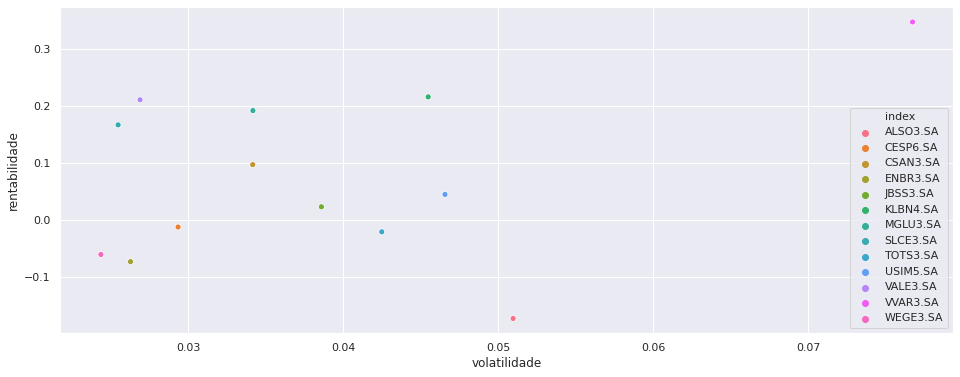

In [0]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="volatilidade", y="rentabilidade", data=x, hue="index")
#tamanho ser o volume

In [0]:
#x.plot.scatter(x="volatilidade", y="rentabilidade")
'''configure_plotly_browser_state()
colors = [item for item in range(1, len(x)+1)] 
#colors = [np.random.randint(0,100) for item in x] 
fig = go.Figure(data=go.Scatter(x=x['volatilidade'],
                                y=x['rentabilidade'],
                                mode='markers',
                                marker_color=colors,
                                text=x['index'])) # hover text goes here

fig.update_layout(title='Rentabilidade x Volatilidade')
fig.show()'''

"configure_plotly_browser_state()\ncolors = [item for item in range(1, len(x)+1)] \n#colors = [np.random.randint(0,100) for item in x] \nfig = go.Figure(data=go.Scatter(x=x['volatilidade'],\n                                y=x['rentabilidade'],\n                                mode='markers',\n                                marker_color=colors,\n                                text=x['index'])) # hover text goes here\n\nfig.update_layout(title='Rentabilidade x Volatilidade')\nfig.show()"

In [0]:
# x and y given as DataFrame columns
configure_plotly_browser_state()
import plotly.express as px
fig = px.scatter(x, x="volatilidade", y="rentabilidade",color="index",
                 #size='volume',
                 #hover_data=['petal_width']
                 )
fig.show()

In [0]:
# Regressao de dados futuros  com indicadores indiretos - Kalman Filter

# ibov, ibov futuro, spx
# varejo, cci(confiaca consumidor), indices de varejo, ipca-15(previa inflacao oficial), ICS, ISA-S, IE-S
# csna, comodites, dolar, futuros
# petrobras, petroleo brent, futuros
# vale, dailan metal, commodities, futuros
# suzano, celulose, commodities, dolar,

# Import a Kalman filter and other useful libraries
!pip install pykalman --upgrade --no-cache-dir
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import poly1d

     |████████████████████████████████| 235kB 2.8MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-cp36-none-any.whl size=48464 sha256=dc4335ee6d87c0c7497c71b6ff29c932c6725d0806b128699258fbe8a3ffc01b
  Stored in directory: /tmp/pip-ephem-wheel-cache-31rj3l5i/wheels/d9/e8/6a/553d9832679cb74a8434fa597c3abdb07313e40054a0adf9ac
Successfully built pykalman


In [0]:
#tickers = ['^GSPC','^SPX','ES=F','^BVSP']
tickers = ['^VIX','^GSPC','^N225','^SSEC','^FCHI','^SZSA','^HSI','^FTSE','ES=F','^BVSP']
cotacoes = web.get_data_yahoo(tickers,period="1y")
print(cotacoes.head(5))
cotacoes = cotacoes['Adj Close']
#cotacoes = cotacoes.iloc[-20:,:]
sns.set()
cotacoes.dropna(subset=['^BVSP']).plot(figsize=(22,8))

[**************        30%                       ]  3 of 10 completed

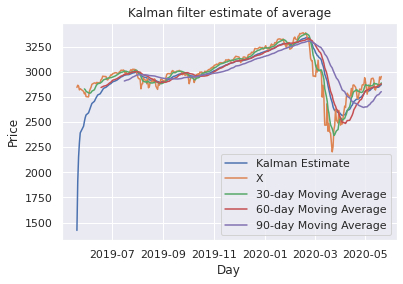

In [0]:
x = cotacoes['ES=F'].dropna()
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
state_means = pd.Series(state_means.flatten(), index=x.index)

# Compute the rolling mean with various lookback windows
mean30 = x.rolling(7).mean()
mean60 = x.rolling(21).mean()
mean90 = x.rolling(42).mean()

# Plot original data and estimated mean
plt.plot(state_means)
plt.plot(x)
plt.plot(mean30)
plt.plot(mean60)
plt.plot(mean90)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman Estimate', 'X', '30-day Moving Average', '60-day Moving Average','90-day Moving Average'])
plt.xlabel('Day')
plt.ylabel('Price');

In [0]:
# Set up the filter
'''
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # position is 1-dimensional, (x,v) is 2-dimensional
                  initial_state_mean=[30,10],
                  initial_state_covariance=np.eye(2),
                  transition_matrices=[[1,tau], [0,1]],
                  observation_matrices=[[1,0]],
                  observation_covariance=3,
                  transition_covariance=np.zeros((2,2)),
                  transition_offsets=[-4.9*tau**2, -9.8*tau])'''

'\nkf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # position is 1-dimensional, (x,v) is 2-dimensional\n                  initial_state_mean=[30,10],\n                  initial_state_covariance=np.eye(2),\n                  transition_matrices=[[1,tau], [0,1]],\n                  observation_matrices=[[1,0]],\n                  observation_covariance=3,\n                  transition_covariance=np.zeros((2,2)),\n                  transition_offsets=[-4.9*tau**2, -9.8*tau])'

Relatorio DataFrame: 
                  ^FCHI        ^FTSE        ^GSPC  ...  ^SSEC  ^SZSA       ^VIX
Date                                               ...                         
2019-05-20  5358.589844  7310.899902  2840.229980  ...    0.0    0.0  16.309999
2019-05-21  5385.459961  7328.899902  2864.360107  ...    0.0    0.0  14.950000
2019-05-22  5378.979980  7334.200195  2856.270020  ...    0.0    0.0  14.750000
2019-05-23  5281.370117  7231.000000  2822.239990  ...    0.0    0.0  16.920000
2019-05-24  5316.509766  7277.700195  2826.060059  ...    0.0    0.0  15.850000

[5 rows x 8 columns]
289
Relatorio Resposta: 
Date
2019-05-20    91946.0
2019-05-21    94485.0
2019-05-22    94361.0
2019-05-23    93910.0
2019-05-24    93628.0
Name: ^BVSP, dtype: float64
289
MAE: -8345.872 (3467.178)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



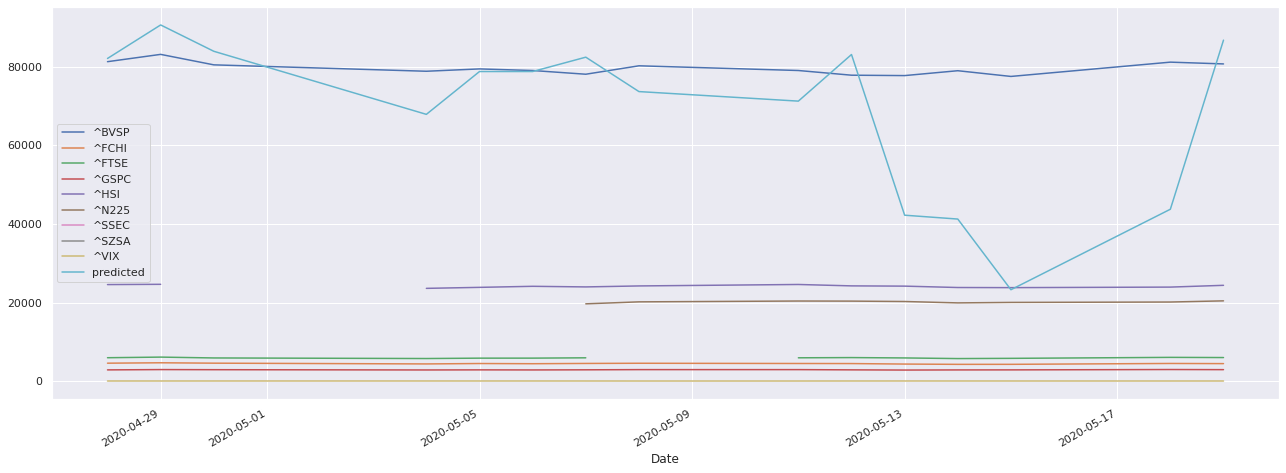

In [0]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
try:
  cotacoes = cotacoes.drop(columns=['ES=F'])
except:
  cotacoes = cotacoes
train = cotacoes.iloc[0:-19,:]
test = cotacoes.iloc[-20:,:]
X = train.copy().drop(columns=['^BVSP']).fillna(0)
print('Relatorio DataFrame: ')
print(X.head(5))
print(len(X))
y = train['^BVSP'].fillna(0)
print('Relatorio Resposta: ')
print(y.head(5))
print(len(y))
# evaluate the model
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingRegressor()
model.fit(X, y)
# make a single prediction
row = test.copy().drop(columns=['^BVSP']).fillna(0)
yhat = model.predict(row)

#print('Prediction: %.3f' % yhat[0])

test['predicted'] = yhat

sns.set()
test.dropna(subset=['^BVSP']).plot(figsize=(22,8))


# CSAN - COSAN

* Petróleo, Gas e Biocombustíveis - Exploração, Refino e Distribuição
* Produção de Açúcar, Etanol e Cogeração de Energia, Distribuição de Combustíveis,Produção e Distribuição de Lubrificantes,Tranporte e Carregamento de Açúcar, Operador de Terras e Distribuição de Gás.
* Tag Along: 100,00% ON
* Free Float: 39,07% ON | 0,00% PN
* Segm. de Listagem: Novo Mercado
* N° Acionistas: 9.705

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed
            Adj Close  ...  ('Open', 'SB=F')_mean21
Date                   ...                         
2020-01-03  73.099998  ...                      NaN
2020-01-06  72.669998  ...                      NaN
2020-01-07  73.980003  ...                      NaN
2020-01-08  72.760002  ...                      NaN
2020-01-09  71.980003  ...                      NaN

[5 rows x 13 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



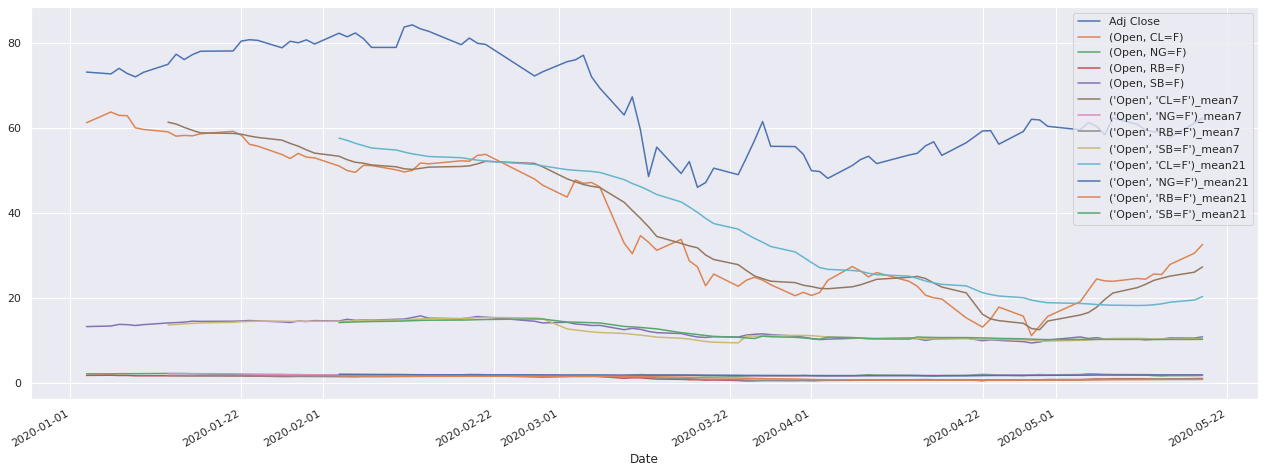

In [0]:
#Commodities
tickers = ['CSAN3.SA']
cotacoes = web.get_data_yahoo(tickers,period="1y")
empresa = cotacoes.copy()[['Adj Close']]
#'IBV=F','^BVSP','BRL=X'
tickers = ['SB=F','RB=F','CL=F','NG=F']
cotacoes = web.get_data_yahoo(tickers,period="1y")
commodities = cotacoes.copy()[['Open']]
commodities = commodities.dropna()
rolling_mean_7 = commodities.rolling(7).mean()
col = [str(x)+'_mean7' for x in list(rolling_mean_7.columns)]
rolling_mean_7.columns = col
rolling_mean_21 = commodities.rolling(21).mean()
col = [str(x)+'_mean21' for x in list(rolling_mean_21.columns)]
rolling_mean_21.columns = col

commodities = commodities.merge(rolling_mean_7,how='left',left_index=True,right_index=True)
commodities = commodities.merge(rolling_mean_21,how='left',left_index=True,right_index=True)

cotacoes = empresa.merge(commodities,how='inner',left_index=True,right_index=True)
#peso no ibovespa
print(cotacoes.head(5))
#cotacoes = cotacoes.iloc[-20:,:]
sns.set()
cotacoes.plot(figsize=(22,8))

Relatorio DataFrame: 
            (Open, CL=F)  ...  ('Open', 'SB=F')_mean21
Date                      ...                         
2020-01-03     61.180000  ...                      0.0
2020-01-06     63.709999  ...                      0.0
2020-01-07     62.910000  ...                      0.0
2020-01-08     62.840000  ...                      0.0
2020-01-09     59.990002  ...                      0.0

[5 rows x 12 columns]
71
Relatorio Resposta: 
Date
2020-01-03    73.099998
2020-01-06    72.669998
2020-01-07    73.980003
2020-01-08    72.760002
2020-01-09    71.980003
Name: Adj Close, dtype: float64
71
MAE: -2.183 (0.662)

Predição do dia
Data maxima: 2020-05-19 00:00:00
Os valores da commodity de hoje ainda não estão disponíveis


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



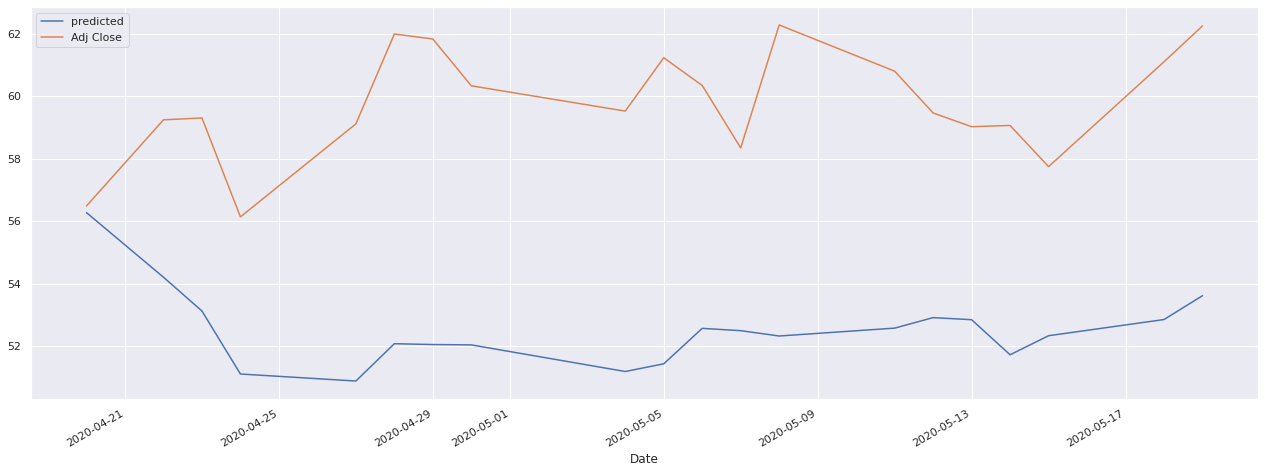

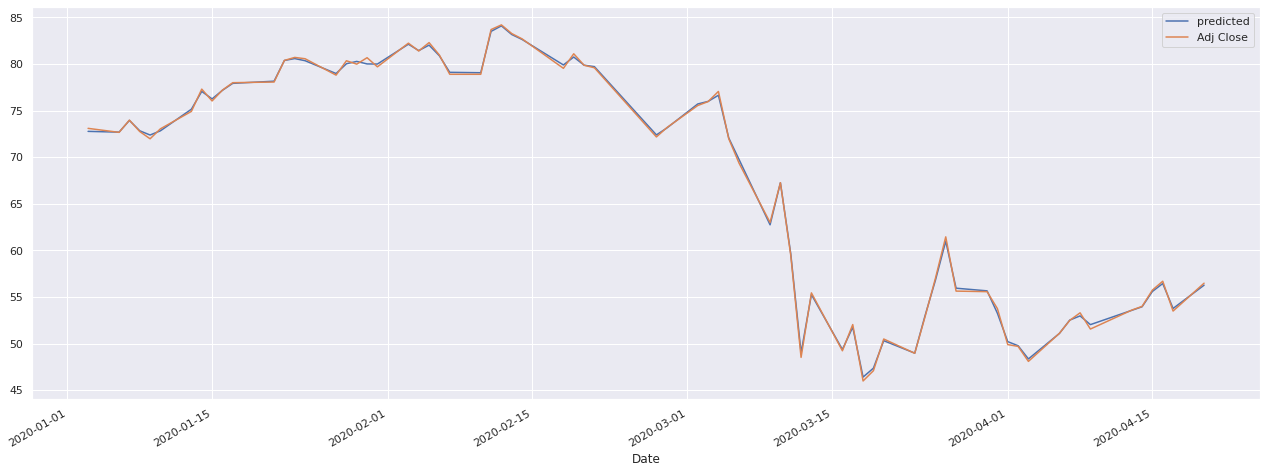

In [0]:
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

train = cotacoes.iloc[0:-19,:]
test = cotacoes.iloc[-20:,:]
X = train.copy().drop(columns=['Adj Close']).fillna(0)
print('Relatorio DataFrame: ')
print(X.head(5))
print(len(X))
y = train['Adj Close'].fillna(0)
print('Relatorio Resposta: ')
print(y.head(5))
print(len(y))
# evaluate the model
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingRegressor()
model.fit(X, y)
# make a single prediction
row = test.copy().drop(columns=['Adj Close']).fillna(0)
yhat = model.predict(row)

#predição da abertura do dia atual - simular cenarios
#today = pd.DataFrame(data=[[21.24,0.83,10.42]],index=['2020-05-05'],columns=['(Open, CL=F)','(Open, RB=F)','(Open, SB=F)'])
print("")
print('Predição do dia')
print("Data maxima: " + str(max(test.index)))
if max(test.index) == dt.date.today():
  today = pd.DataFrame(data=[list(commodities.fillna(0).iloc[-1,:])],index=[dt.date.today()],columns=list(commodities.columns))
  print(today)
  pred = model.predict(today)
  i = -2
  last_val = yhat[i]
  print("Ultimo valor: " + str(last_val) + " na data: " + str(test.index[i]))
  print('Prediction: %.3f' % pred)
  print("Variação de " + str(((pred - last_val) /last_val) *100) + " %")
else:
  print('Os valores da commodity de hoje ainda não estão disponíveis')

'''today = pd.DataFrame(data=[list(commodities.iloc[-1,:])],index=[dt.date.today()],columns=['(Open, CL=F)','(Open, RB=F)','(Open, SB=F)'])
print(today)
pred = model.predict(today)
i = -2
last_val = yhat[i]
print("")
print("Data maxima: " + str(max(test.index)))
print("Ultimo valor: " + str(last_val) + "na data: " + str(test.index[i]))
print('Prediction: %.3f' % pred)
print("Variação de " + str(((pred - last_val) /last_val) *100) + " %")'''

test['predicted'] = yhat

sns.set()
#test.dropna(subset=['Adj Close']).plot(figsize=(22,8))
#test = test.append(today)
#test
test[['predicted','Adj Close']].plot(figsize=(22,8))
#train
train['predicted'] = model.predict(train.copy().drop(columns=['Adj Close']).fillna(0))
train[['predicted','Adj Close']].plot(figsize=(22,8))

Indice de acertos: 50.0 % 


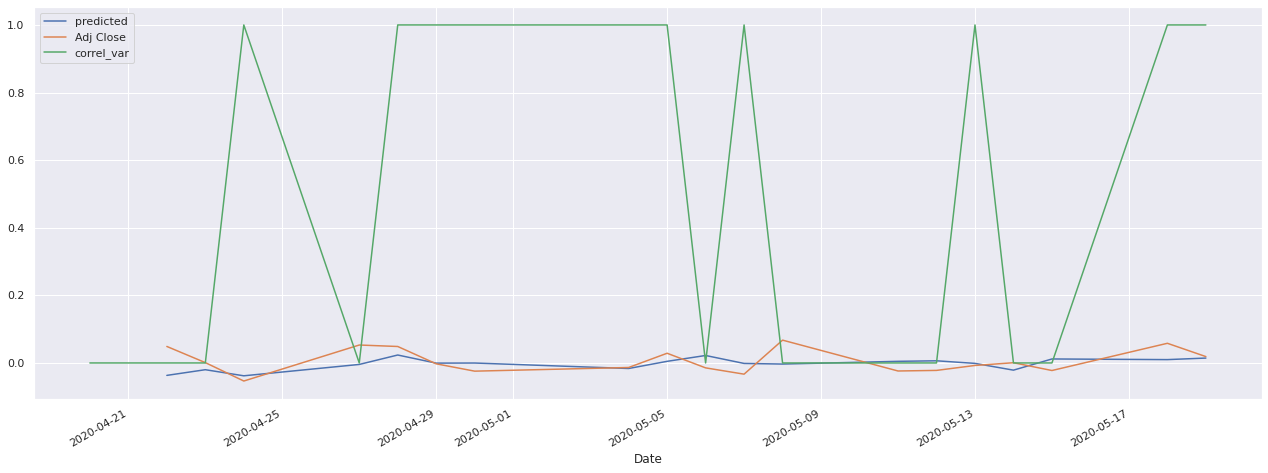

In [0]:
#correlação positiva/negativa e índice de acerto de tendência - teste
correl_var = test.pct_change()
correl_var['correl_var'] = correl_var.apply(lambda row: 1 if (row['Adj Close'] * row['predicted']) > 0 else 0, axis=1)
print("Indice de acertos: " + str((sum(correl_var['correl_var'])/len(correl_var))*100) + " % ")
sns.set()
correl_var[['predicted','Adj Close','correl_var']].plot(figsize=(22,8))

Indice de acertos: 94.36619718309859 % 


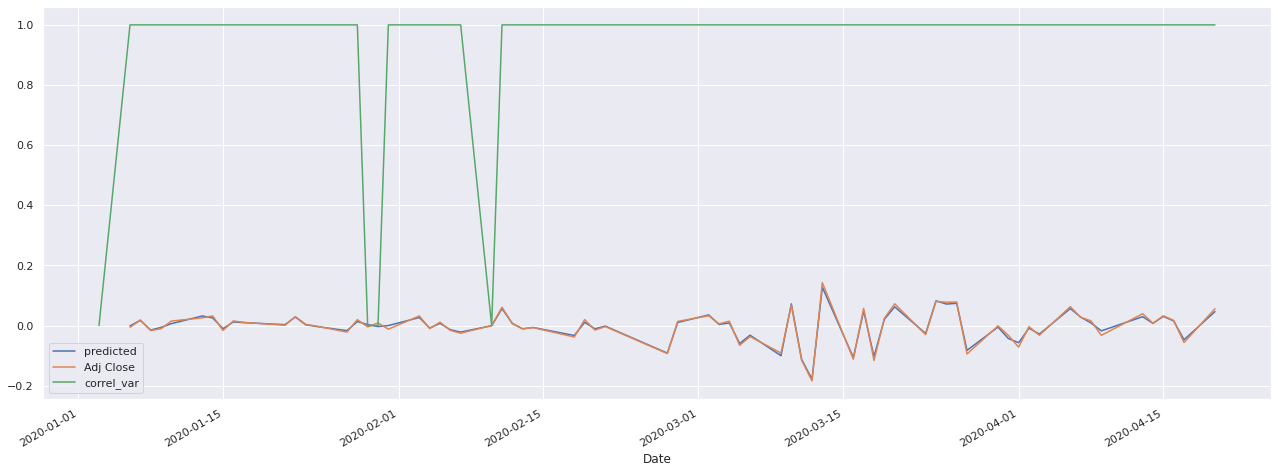

In [0]:
#correlação positiva/negativa e índice de acerto de tendência - treino
correl_var = train.pct_change()
correl_var['correl_var'] = correl_var.apply(lambda row: 1 if (row['Adj Close'] * row['predicted']) > 0 else 0, axis=1)
print("Indice de acertos: " + str((sum(correl_var['correl_var'])/len(correl_var))*100) + " % ")
sns.set()
correl_var[['predicted','Adj Close','correl_var']].plot(figsize=(22,8))

In [0]:
#correlação entre variáveis
train.corr()

Adj Close  ...  predicted
Adj Close                 1.000000  ...   0.999817
(Open, CL=F)              0.885660  ...   0.888109
(Open, NG=F)              0.583346  ...   0.584964
(Open, RB=F)              0.913942  ...   0.916363
(Open, SB=F)              0.960383  ...   0.962527
('Open', 'CL=F')_mean7    0.912931  ...   0.915334
('Open', 'NG=F')_mean7    0.652002  ...   0.654065
('Open', 'RB=F')_mean7    0.891070  ...   0.893730
('Open', 'SB=F')_mean7    0.941227  ...   0.942988
('Open', 'CL=F')_mean21   0.836305  ...   0.839123
('Open', 'NG=F')_mean21   0.828354  ...   0.830570
('Open', 'RB=F')_mean21   0.753634  ...   0.756544
('Open', 'SB=F')_mean21   0.909200  ...   0.912202
predicted                 0.999817  ...   1.000000

[14 rows x 14 columns]

[(('Open', 'NG=F'), ('Open', 'RB=F')), (('Open', 'NG=F'), "('Open', 'NG=F')_mean21"), (('Open', 'NG=F'), "('Open', 'SB=F')_mean21"), ("('Open', 'NG=F')_mean7", "('Open', 'CL=F')_mean21"), ("('Open', 'NG=F')_mean7", "('Open', 'NG=F')_mean21"), ("('Open', 'NG=F')_mean7", "('Open', 'RB=F')_mean21"), ("('Open', 'NG=F')_mean7", "('Open', 'SB=F')_mean21")]


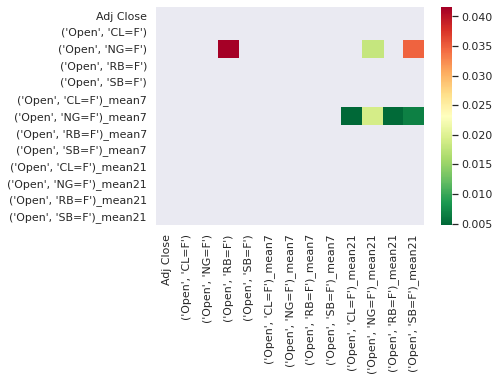

In [0]:
#cointegration
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

scores, pvalues, pairs = find_cointegrated_pairs(cotacoes.fillna(0))

sns.heatmap(pvalues, xticklabels=list(cotacoes.columns), yticklabels=list(cotacoes.columns), cmap='RdYlGn_r',mask = (pvalues >= 0.05))
print(pairs)

In [0]:
#pd.plotting.scatter_matrix(train, figsize=(12, 12))
#plt.show()

# JBSS - JBS

* Multinacional atuante no processamento de carnes bovina, suína e ovina. Também atua na produção de couros.
* Tag Along: 100,00% ON
* Free Float: 34,90% ON | 0,00% PN
* Segm. de Listagem: Novo Mercado
* N° Acionistas: 11.151
* Alimentos Processados - Carnes e Derivador

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



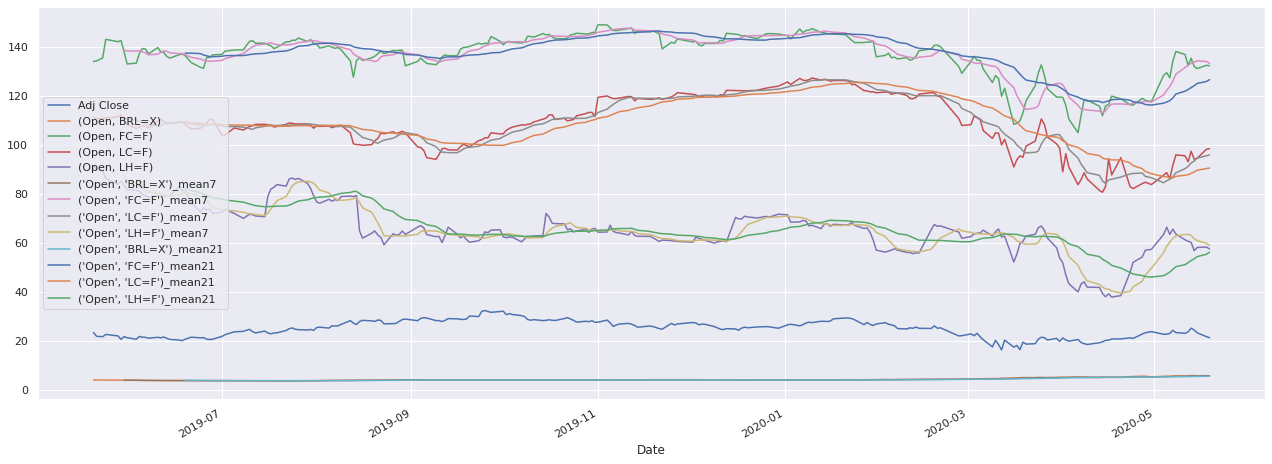

In [0]:
#Commodities
tickers = ['JBSS3.SA']
#tickers = ['MRFG3.SA']
cotacoes = web.get_data_yahoo(tickers,period="1y")
empresa = cotacoes.copy()[['Adj Close']]
#'IBV=F','^BVSP','BRL=X'
tickers = ['FC=F','LH=F','LC=F','BRL=X']
cotacoes = web.get_data_yahoo(tickers,period="1y")
commodities = cotacoes.copy()[['Open']]
commodities = commodities.dropna()
rolling_mean_7 = commodities.rolling(7).mean()
col = [str(x)+'_mean7' for x in list(rolling_mean_7.columns)]
rolling_mean_7.columns = col
rolling_mean_21 = commodities.rolling(21).mean()
col = [str(x)+'_mean21' for x in list(rolling_mean_21.columns)]
rolling_mean_21.columns = col

commodities = commodities.merge(rolling_mean_7,how='left',left_index=True,right_index=True)
commodities = commodities.merge(rolling_mean_21,how='left',left_index=True,right_index=True)

cotacoes = empresa.merge(commodities,how='inner',left_index=True,right_index=True)
#cotacoes = cotacoes.iloc[-20:,:]
sns.set()
cotacoes.plot(figsize=(22,8))

Relatorio DataFrame: 
            (Open, BRL=X)  ...  ('Open', 'LH=F')_mean21
Date                       ...                         
2019-05-20         4.0958  ...                      0.0
2019-05-21         4.0951  ...                      0.0
2019-05-23         4.0369  ...                      0.0
2019-05-24         4.0384  ...                      0.0
2019-05-28         4.0415  ...                      0.0

[5 rows x 12 columns]
218
Relatorio Resposta: 
Date
2019-05-20    23.467371
2019-05-21    21.932854
2019-05-23    21.766695
2019-05-24    22.695225
2019-05-28    22.089237
Name: Adj Close, dtype: float64
218
MAE: -0.607 (0.115)

Predição do dia
Data maxima: 2020-05-19 00:00:00
Os valores da commodity de hoje ainda não estão disponíveis


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



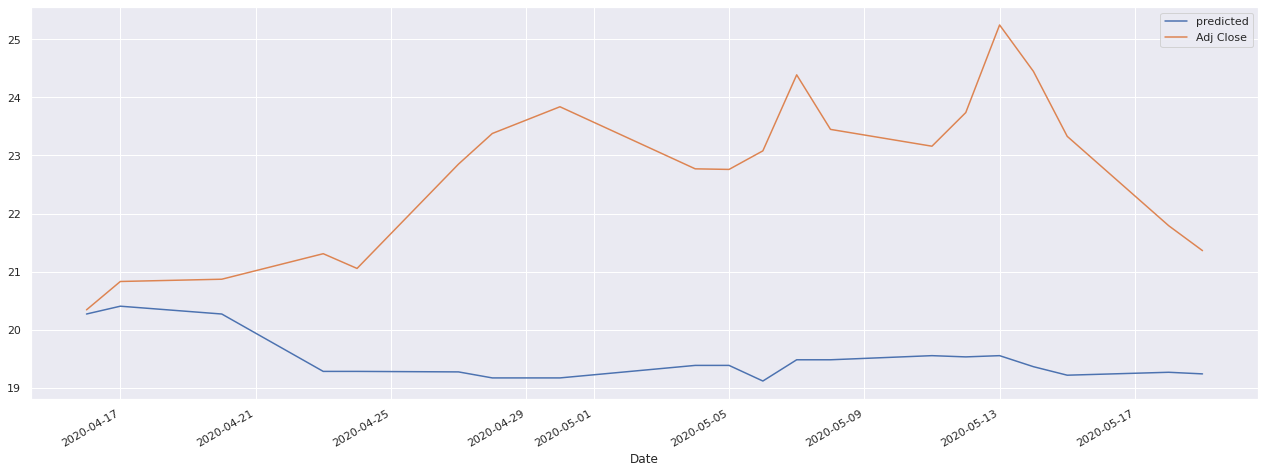

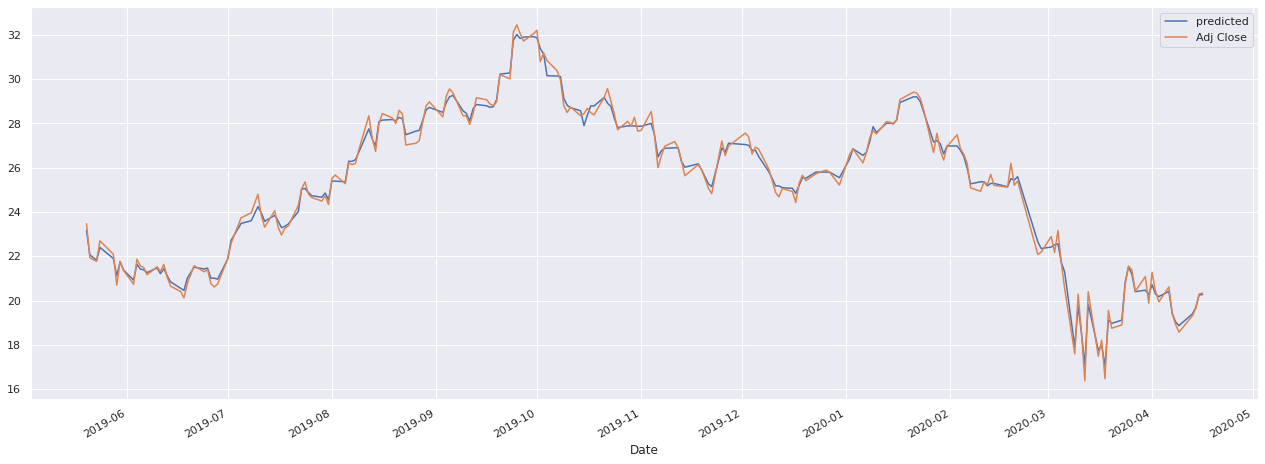

In [0]:
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

train = cotacoes.iloc[0:-19,:]
test = cotacoes.iloc[-20:,:]
X = train.copy().drop(columns=['Adj Close']).fillna(0)
print('Relatorio DataFrame: ')
print(X.head(5))
print(len(X))
y = train['Adj Close'].fillna(0)
print('Relatorio Resposta: ')
print(y.head(5))
print(len(y))
# evaluate the model
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingRegressor()
model.fit(X, y)
# make a single prediction
row = test.copy().drop(columns=['Adj Close']).fillna(0)
yhat = model.predict(row)

#predição da abertura do dia atual - simular cenarios
#today = pd.DataFrame(data=[[5.542,117.72,86.50,60.92]],index=['2020-05-05'],columns=['(Open, BRL=X)','(Open, FC=F)','(Open, LC=F)','(Open, LH=F)'])
print("")
print('Predição do dia')
print("Data maxima: " + str(max(test.index)))
if max(test.index) == dt.date.today():
  today = pd.DataFrame(data=[list(commodities.fillna(0).iloc[-1,:])],index=[dt.date.today()],columns=list(commodities.columns))
  print(today)
  pred = model.predict(today)
  i = -2
  last_val = yhat[i]
  print("Ultimo valor: " + str(last_val) + " na data: " + str(test.index[i]))
  print('Prediction: %.3f' % pred)
  print("Variação de " + str(((pred - last_val) /last_val) *100) + " %")
else:
  print('Os valores da commodity de hoje ainda não estão disponíveis')

test['predicted'] = yhat

sns.set()
#test.dropna(subset=['Adj Close']).plot(figsize=(22,8))
#test = test.append(today)
#test
test[['predicted','Adj Close']].plot(figsize=(22,8))
#train
train['predicted'] = model.predict(train.copy().drop(columns=['Adj Close']).fillna(0))
train[['predicted','Adj Close']].plot(figsize=(22,8))

            Adj Close  (Open, BRL=X)  ...  ('Open', 'LH=F')_mean21  predicted
Date                                  ...                                    
2020-04-16        NaN            NaN  ...                      NaN        NaN
2020-04-17   0.024027      -0.001088  ...                -0.020019   0.006648
2020-04-20   0.001877       0.000229  ...                -0.020802  -0.006604
2020-04-23   0.021077       0.042589  ...                -0.036227  -0.048799
2020-04-24  -0.011927       0.014111  ...                -0.014059   0.000000
2020-04-27   0.085422       0.010572  ...                -0.012750  -0.000450
2020-04-28   0.023097       0.010926  ...                -0.008279  -0.005377
2020-04-30   0.019701      -0.056304  ...                -0.004726   0.000000
2020-05-04  -0.044883       0.028192  ...                 0.011949   0.011255
2020-05-05  -0.000439       0.009844  ...                 0.014792   0.000000
2020-05-06   0.014060       0.007023  ...                 0.0166

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



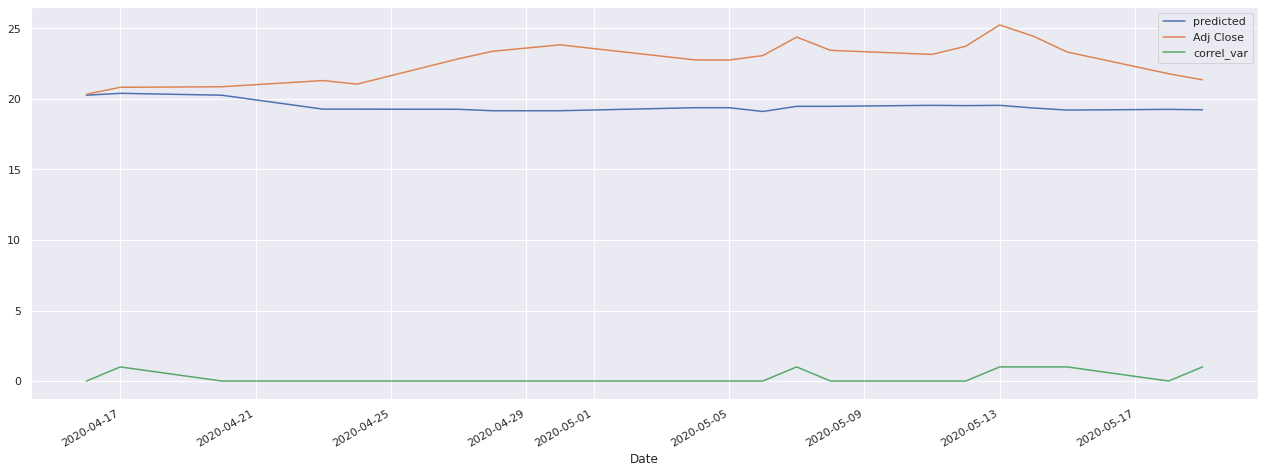

In [0]:
#correlação positiva/negativa e índice de acerto de tendência - teste
correl_var = test.pct_change()
print(correl_var)
correl_var['correl_var'] = correl_var.apply(lambda row: 1 if (row['Adj Close'] * row['predicted']) > 0 else 0, axis=1)
print("Indice de acertos: " + str((sum(correl_var['correl_var'])/len(correl_var))*100) + " % ")
sns.set()
#correl_var[['predicted','Adj Close','correl_var']].plot(figsize=(22,8))
test['correl_var'] = correl_var['correl_var'] 
test[['predicted','Adj Close','correl_var']].plot(figsize=(22,8))

Indice de acertos: 83.94495412844036 % 


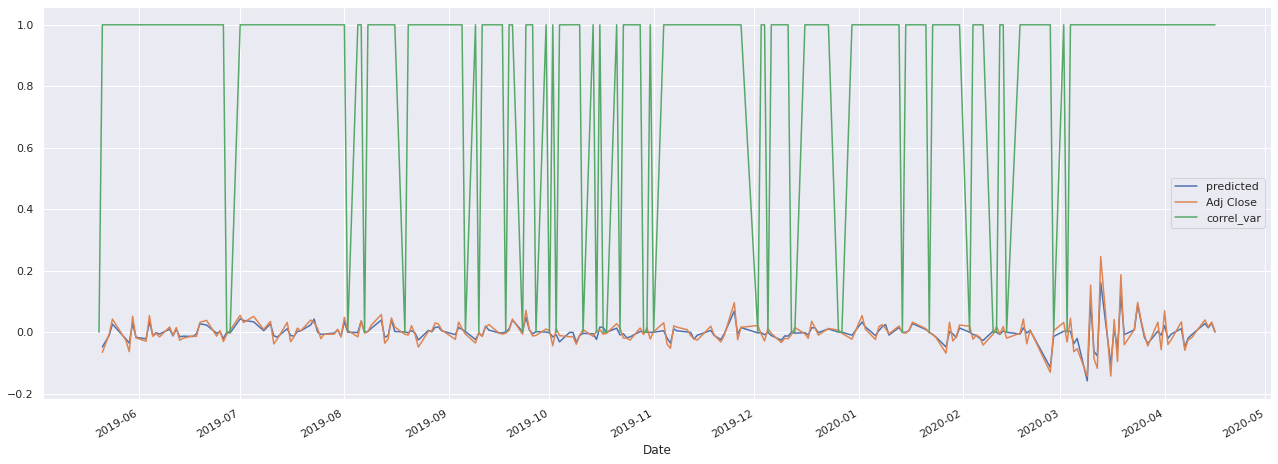

In [0]:
#correlação positiva/negativa e índice de acerto de tendência - treino
correl_var = train.pct_change()
correl_var['correl_var'] = correl_var.apply(lambda row: 1 if (row['Adj Close'] * row['predicted']) > 0 else 0, axis=1)
print("Indice de acertos: " + str((sum(correl_var['correl_var'])/len(correl_var))*100) + " % ")
sns.set()
correl_var[['predicted','Adj Close','correl_var']].plot(figsize=(22,8))

In [0]:
#correlação entre variáveis
train.corr()

Adj Close  ...  predicted
Adj Close                  1.000000  ...   0.996911
(Open, BRL=X)             -0.440909  ...  -0.448804
(Open, FC=F)               0.662903  ...   0.671343
(Open, LC=F)               0.325904  ...   0.331695
(Open, LH=F)              -0.031290  ...  -0.030888
('Open', 'BRL=X')_mean7   -0.453368  ...  -0.462323
('Open', 'FC=F')_mean7     0.659820  ...   0.668421
('Open', 'LC=F')_mean7     0.256570  ...   0.261518
('Open', 'LH=F')_mean7    -0.029513  ...  -0.028856
('Open', 'BRL=X')_mean21  -0.539848  ...  -0.550040
('Open', 'FC=F')_mean21    0.622031  ...   0.632294
('Open', 'LC=F')_mean21    0.044585  ...   0.048366
('Open', 'LH=F')_mean21    0.091057  ...   0.094967
predicted                  0.996911  ...   1.000000

[14 rows x 14 columns]

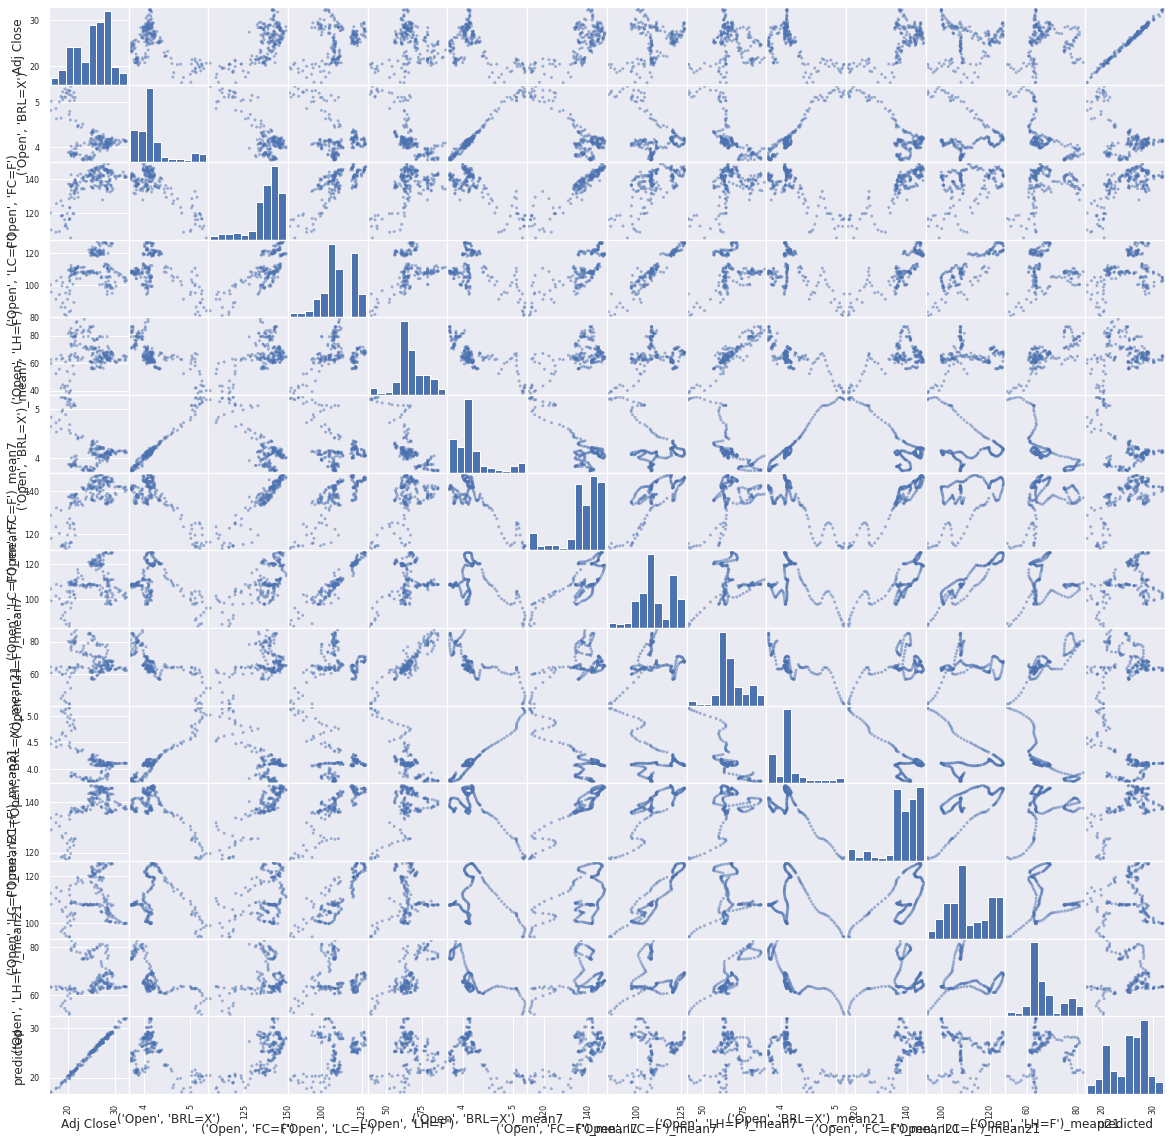

In [0]:
pd.plotting.scatter_matrix(train, figsize=(20, 20))
plt.show()

# SLCE - SLC Agricola

* Produção e comercialização de algodão, soja, milho, café, entre outros.
* Tag Along: 100,00% ON
* Free Float: 35,70% ON | 0,00% PN
* Segm. de Listagem: Novo Mercado
* N° Acionistas: 85.229.048

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  3 of 3 completed


/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



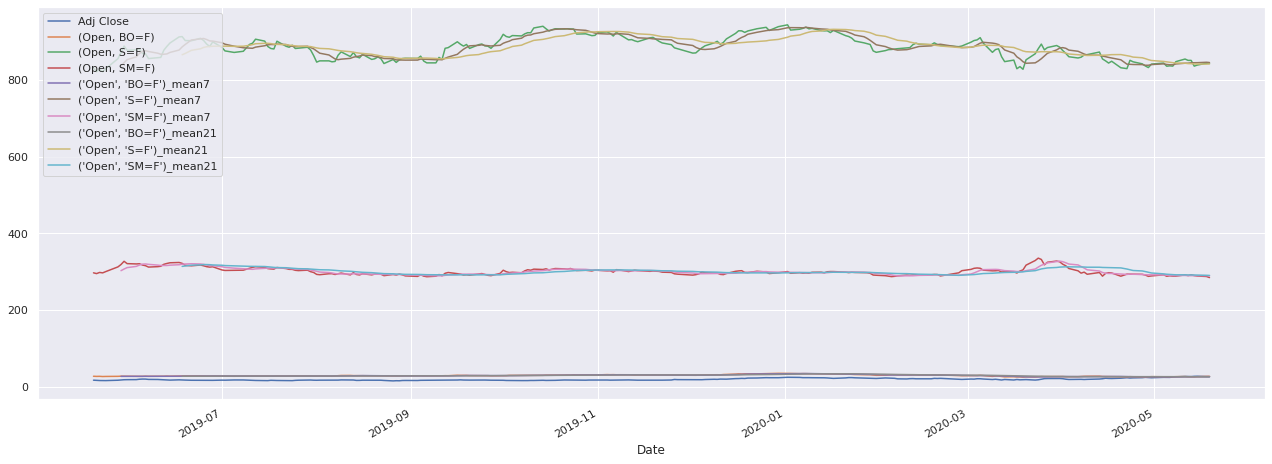

In [0]:
#Commodities
period = '1y'
tickers = ['SLCE3.SA']
cotacoes = web.get_data_yahoo(tickers,period=period )
empresa = cotacoes.copy()[['Adj Close']]
#'IBV=F','^BVSP','BRL=X'
tickers = ['S=F','BO=F','SM=F']
cotacoes = web.get_data_yahoo(tickers,period=period )
commodities = cotacoes.copy()[['Open']]
commodities = commodities.dropna()
rolling_mean_7 = commodities.rolling(7).mean()
col = [str(x)+'_mean7' for x in list(rolling_mean_7.columns)]
rolling_mean_7.columns = col
rolling_mean_21 = commodities.rolling(21).mean()
col = [str(x)+'_mean21' for x in list(rolling_mean_21.columns)]
rolling_mean_21.columns = col

commodities = commodities.merge(rolling_mean_7,how='left',left_index=True,right_index=True)
commodities = commodities.merge(rolling_mean_21,how='left',left_index=True,right_index=True)


cotacoes = empresa.merge(commodities,how='inner',left_index=True,right_index=True)
#cotacoes = cotacoes.iloc[-20:,:]
sns.set()
cotacoes.plot(figsize=(22,8))

Relatorio DataFrame: 
            (Open, BO=F)  ...  ('Open', 'SM=F')_mean21
Date                      ...                         
2019-05-20     27.500000  ...                      0.0
2019-05-21     27.139999  ...                      0.0
2019-05-22     27.309999  ...                      0.0
2019-05-23     26.780001  ...                      0.0
2019-05-24     27.010000  ...                      0.0

[5 rows x 9 columns]
161
Relatorio Resposta: 
Date
2019-05-20    17.260380
2019-05-21    16.745142
2019-05-22    16.363487
2019-05-23    16.325321
2019-05-24    16.172661
Name: Adj Close, dtype: float64
161
MAE: -0.336 (0.088)
            (Open, BO=F)  ...  ('Open', 'SM=F')_mean21
2020-05-20         27.01  ...                290.29524

[1 rows x 9 columns]

Data maxima: 2020-05-19 00:00:00
Ultimo valor: 16.86582375775469 na data: 2020-05-18 00:00:00
Prediction: 16.846
Variação de [-0.11615862] %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



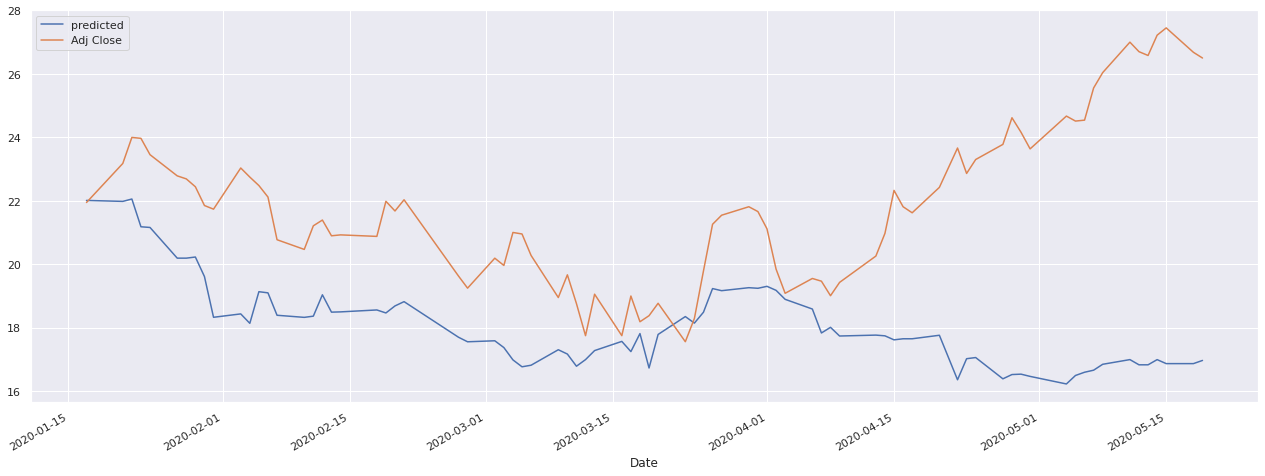

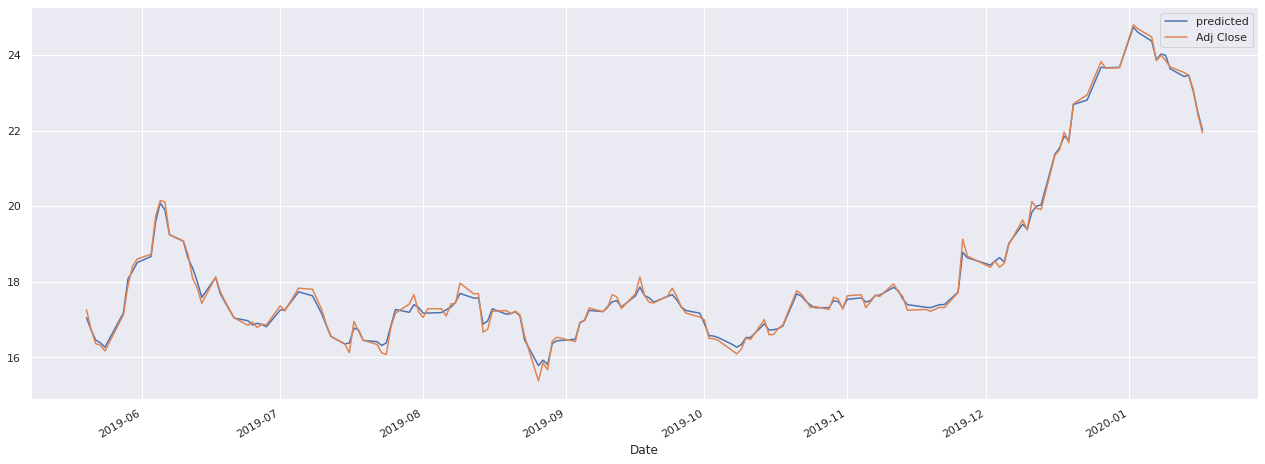

In [0]:
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

train = cotacoes.iloc[0:-79,:]
test = cotacoes.iloc[-80:,:]
X = train.copy().drop(columns=['Adj Close']).fillna(0)
#scaler = preprocessing.StandardScaler().fit(X)
#X = scaler.transform(X)
print('Relatorio DataFrame: ')
print(X.head(5))
print(len(X))
y = train['Adj Close'].fillna(0)
print('Relatorio Resposta: ')
print(y.head(5))
print(len(y))
# evaluate the model
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingRegressor()
model.fit(X, y)
# make a single prediction
row = test.copy().drop(columns=['Adj Close']).fillna(0)
#row = scaler.transform(row)
yhat = model.predict(row)

#predição da abertura do dia atual - simular cenarios
#today = pd.DataFrame(data=[[26.18,837.50,287.70]],index=['2020-05-05'],columns=['(Open, BO=F)','(Open, S=F)','(Open, SM=F)'])
today = pd.DataFrame(data=[list(commodities.iloc[-1,:])],index=[dt.date.today()],columns=list(commodities.columns))
print(today)
pred = model.predict(today)
i = -2
last_val = yhat[i]
print("")
print("Data maxima: " + str(max(test.index)))
print("Ultimo valor: " + str(last_val) + " na data: " + str(test.index[i]))
print('Prediction: %.3f' % pred)
print("Variação de " + str(((pred - last_val) /last_val) *100) + " %")


test['predicted'] = yhat

sns.set()
#test.dropna(subset=['Adj Close']).plot(figsize=(22,8))
#test = test.append(today)
#test
test[['predicted','Adj Close']].plot(figsize=(22,8))
#train
train['predicted'] = model.predict(train.copy().drop(columns=['Adj Close']).fillna(0))
train[['predicted','Adj Close']].plot(figsize=(22,8))

Indice de acertos: 53.75 % 


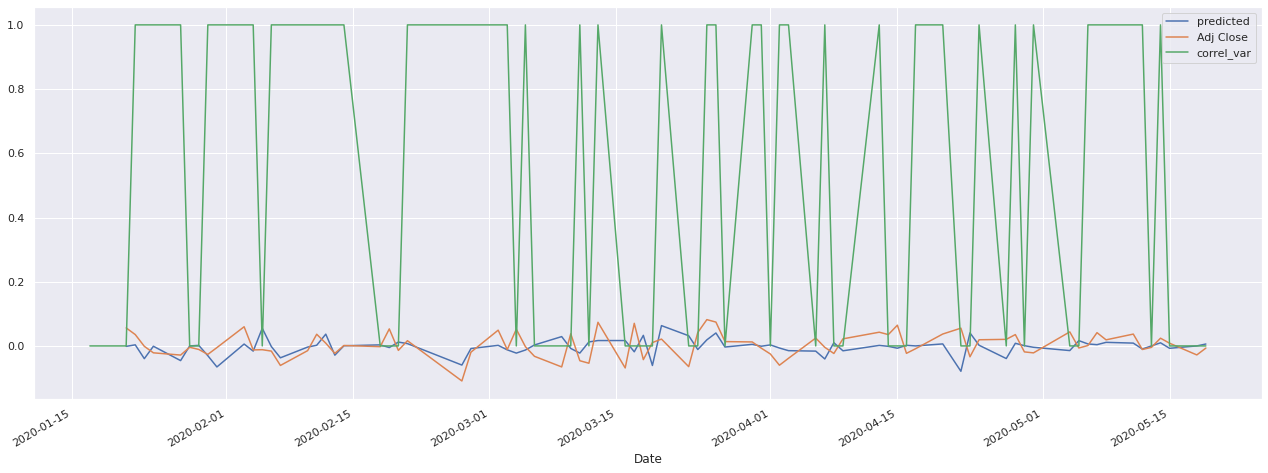

In [0]:
#correlação positiva/negativa e índice de acerto de tendência - teste
correl_var = test.pct_change()
correl_var['correl_var'] = correl_var.apply(lambda row: 1 if (row['Adj Close'] * row['predicted']) > 0 else 0, axis=1)
print("Indice de acertos: " + str((sum(correl_var['correl_var'])/len(correl_var))*100) + " % ")
sns.set()
correl_var[['predicted','Adj Close','correl_var']].plot(figsize=(22,8))

Indice de acertos: 84.472049689441 % 


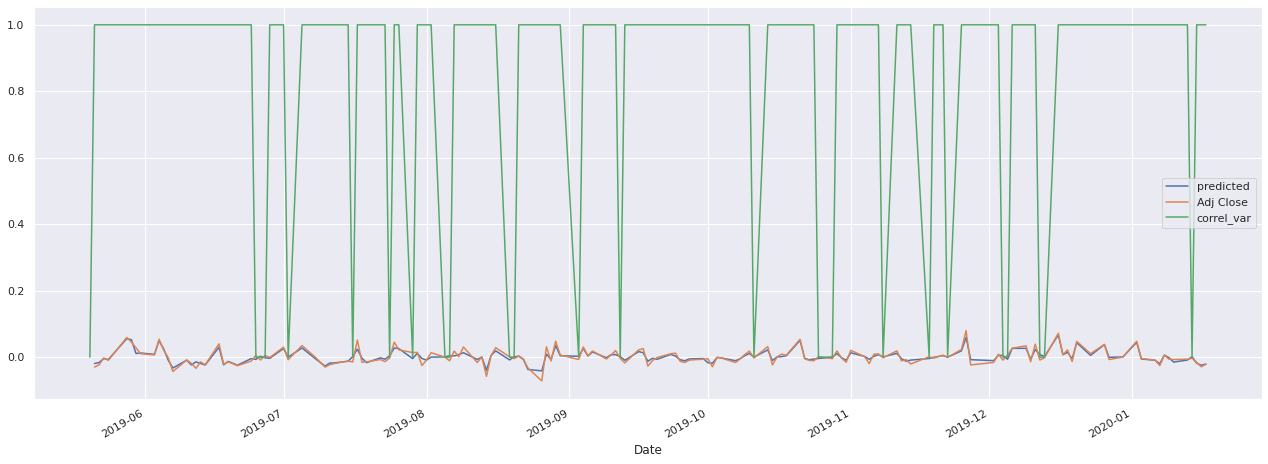

In [0]:
#correlação positiva/negativa e índice de acerto de tendência - treino
correl_var = train.pct_change()
correl_var['correl_var'] = correl_var.apply(lambda row: 1 if (row['Adj Close'] * row['predicted']) > 0 else 0, axis=1)
print("Indice de acertos: " + str((sum(correl_var['correl_var'])/len(correl_var))*100) + " % ")
sns.set()
correl_var[['predicted','Adj Close','correl_var']].plot(figsize=(22,8))

In [0]:
#correlação entre variáveis
train.corr()

Adj Close  ...  predicted
Adj Close                 1.000000  ...   0.998574
(Open, BO=F)              0.781273  ...   0.787429
(Open, S=F)               0.470323  ...   0.475427
(Open, SM=F)             -0.063464  ...  -0.062688
('Open', 'BO=F')_mean7    0.781847  ...   0.788586
('Open', 'S=F')_mean7     0.442840  ...   0.448417
('Open', 'SM=F')_mean7   -0.094299  ...  -0.095308
('Open', 'BO=F')_mean21   0.819284  ...   0.826578
('Open', 'S=F')_mean21    0.434610  ...   0.440210
('Open', 'SM=F')_mean21  -0.208109  ...  -0.211015
predicted                 0.998574  ...   1.000000

[11 rows x 11 columns]

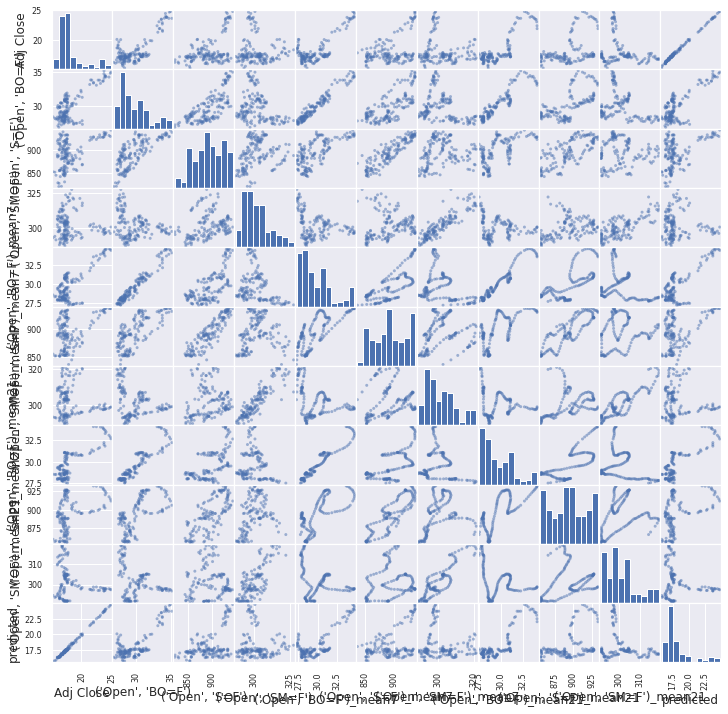

In [0]:
pd.plotting.scatter_matrix(train, figsize=(12, 12))
plt.show()